# Titanic Data Cleaning and Exploration
This notebook focuses on cleaning and exploring the Titanic dataset.
We maintain the original dataset in `df_org` to prevent accidental overwriting during preprocessing.
Modeling is not included in this version.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


## Exploaring the data

In [5]:
df.info() #mis types Age ,Survived, class,Age_wiki #life boat col needs to be cleaned got some characters like ?./

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [6]:
df.duplicated().sum() #checking for duplicates

0

In [7]:
df.isnull().sum() #total of the missing in each col to make it easy to see 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Age_wiki         4
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

In [8]:
df["Survived"]=df["Survived"].astype(int) #change its data type to int 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,514.0,"Montvila, Father Juozas",27.0,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",NaN,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,137.0,"Graham, Miss Margaret Edith",19.0,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,NaN,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,S,910.0,"Johnston, Miss Catherine Nellie",7.0,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",NaN,NaN,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,28.0,"Behr, Mr. Karl Howell",26.0,"New York, New York, US",Cherbourg,"New York, New York, US",5,NaN,1.0


In [9]:
df["Sex"]=df["Sex"].replace("male","Male") #to make it better to see just capitalize (optional) 
df["Sex"]=df["Sex"].replace("female","Female") 

## Filling the missing values

### we will use age wiki to fill Age column so we need to fix it first (They both the same)

In [12]:
Age_wiki_median=df["Age_wiki"].median() 
df["Age_wiki"]=df["Age_wiki"].fillna(Age_wiki_median)


In [13]:
df['Age'] = df['Age'].fillna(df['Age_wiki']) #fix the missing values using Age_wiki it is the same as Age 
df.drop('Age_wiki', axis=1, inplace=True)

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
WikiId           2
Name_wiki        2
Hometown         2
Boarded          2
Destination      2
Lifeboat       546
Body           804
Class            2
dtype: int64

### change the Age col data type after filling it cause age was float

In [16]:
df["Age"]=df["Age"].astype(int) 

### Embarked got only 2 missing values we will use the mode

In [18]:
Embarked_mode=df["Embarked"].mode().iloc[0] #fill the missing 
df["Embarked"]=df["Embarked"].fillna(Embarked_mode)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Hometown     889 non-null    object 
 15  Boarded      889 non-null    object 
 16  Destination  889 non-null    object 
 17  Lifeboat     345 non-null    object 
 18  Body         87 non-null     object 
 19  Class   

### Droping unnecessary columns in our analysis

In [21]:
df.drop('Name_wiki', axis=1, inplace=True) #it is the same as name col so we drop it 
df.drop('WikiId', axis=1, inplace=True)

### Hometown got 2 missing we use mode

In [23]:
Hometown_mode=df["Hometown"].mode().iloc[0] #fill missing 
df["Hometown"]=df["Hometown"].fillna(Hometown_mode)

### Boarded , Embarked they are the same but one is word the other is letter

In [25]:
df[df['Boarded'].notna() & df['Embarked'].notna()][['Boarded', 'Embarked']].value_counts() 

Boarded      Embarked
Southampton  S           625
Cherbourg    C           156
Queenstown   Q            75
Southampton  C            11
Cherbourg    S            10
Belfast      S             9
Southampton  Q             2
Queenstown   S             1
Name: count, dtype: int64

In [26]:
# Define mapping from code to full name
port_map = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

# Fill missing Boarded using Embarked
df['Boarded'] = df['Boarded'].fillna(df['Embarked'].map(port_map))


### Destination also got only 2 missing values so we will use mode

In [28]:
Destination_mode=df["Destination"].mode().iloc[0] #fill missing
df["Destination"]=df["Destination"].fillna(Destination_mode)

### Life boat column need to be cleaned before filling the missing 

In [30]:
df["Lifeboat"]=df["Lifeboat"].str.strip("?/.") #clean the col first before anything 

### here lifeboat column got a lot of missing values but for the experment i tried to see the boats used by each class and use this to fill the missing

In [32]:
df[df['Lifeboat'].notna()].groupby('Pclass')['Lifeboat'].value_counts() #we check the most freq boats used by each class


Pclass  Lifeboat
1       3           21
        5           21
        8           17
        4           16
        6           15
        7           11
        D            7
        10           5
        2            5
        9            5
        1            3
        11           3
        14           3
        B            2
        15           1
        A            1
        C            1
2       14          16
        9           12
        10          11
        11          11
        12          11
        13           9
        4            6
                     5
        16           3
        D            2
        15           1
        B            1
3       C           27
        15          26
        13          17
        16          15
                     5
        A            5
        D            5
        14           4
        B            4
        2            3
        9            3
        10           2
        11           2
        12       

In [33]:
# Step 1: Get the most common (mode) lifeboat for each class, ignoring missing/empty
mode_lifeboat = df[df['Lifeboat'].notna() & (df['Lifeboat'] != '')].groupby('Pclass')['Lifeboat'].agg(lambda x: x.mode()[0])

# Step 2: Fill missing (NaN or empty string '') with class-based mode
df['Lifeboat'] = df.apply(
    lambda row: mode_lifeboat[row['Pclass']] if pd.isna(row['Lifeboat']) else row['Lifeboat'],
    axis=1
)

### Droping unnecessary columns in our analysis

In [35]:
df.drop('Body', axis=1, inplace=True) #over 90% missing so we drop it 

In [36]:
df.drop('Class', axis=1, inplace=True) #class is the same as pclass col so i will discard it 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Hometown     891 non-null    object 
 13  Boarded      891 non-null    object 
 14  Destination  891 non-null    object 
 15  Lifeboat     891 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(9)
memory usage: 104.5+ KB


### here cabin i thought of what we get from the cabin column? we get the place of the passenger on the ship so the letter in cabin number tell which place the passenger in also from the place you tells the class so we could use both to fill the missing and create new column named deck

In [39]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [40]:
df['Deck'] = df['Cabin'].str[0] #the letter in start of each cabin gives a insight where the cabin was also what th P class was


In [41]:
df = df.drop(columns=['Cabin']) #and we will keep deck


In [42]:
deck_info = {  #after a little search i tried to get the means of each letter
    'A': {'name': 'Promenade Deck', 'class': 1},
    'B': {'name': 'Bridge Deck', 'class': 1},
    'C': {'name': 'Shelter Deck', 'class': 1},
    'D': {'name': 'Saloon Deck', 'class': 1},
    'E': {'name': 'Upper Deck', 'class': 2},
    'F': {'name': 'Middle Deck', 'class': 2},
    'G': {'name': 'Lower Deck', 'class': 3},
    'U': {'name': 'Unknown', 'class': None}  # U = filled NaN
}

In [43]:
# Step 1: Compute the most frequent deck (mode) for each Pclass (excluding NaN decks)
deck_mode_by_class = df[df['Deck'].notna()].groupby('Pclass')['Deck'].agg(lambda x: x.mode()[0])

# Step 2: Fill NaN Decks using the mode deck of their Pclass
df['Deck'] = df.apply(
    lambda row: deck_mode_by_class[row['Pclass']] if pd.isna(row['Deck']) else row['Deck'],
    axis=1
)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Hometown     891 non-null    object 
 12  Boarded      891 non-null    object 
 13  Destination  891 non-null    object 
 14  Lifeboat     891 non-null    object 
 15  Deck         891 non-null    object 
dtypes: float64(1), int32(2), int64(4), object(9)
memory usage: 104.5+ KB


In [45]:
print(df['Deck'].unique())



['F' 'C' 'E' 'G' 'D' 'A' 'B' 'T']


# the outliers part

In [47]:
df.describe() #what to watch here Age,Fare	

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.370370,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.083929,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


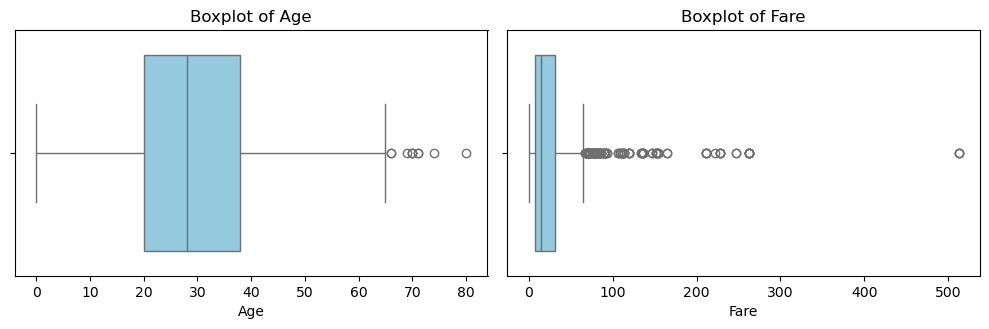

In [48]:
# Columns to visualize
cols = ['Age', 'Fare']

# Set up the figure
plt.figure(figsize=(10, 6))

# Loop over each column to create a subplot
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [49]:
numeric_cols=['Age', 'Fare']
for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)   


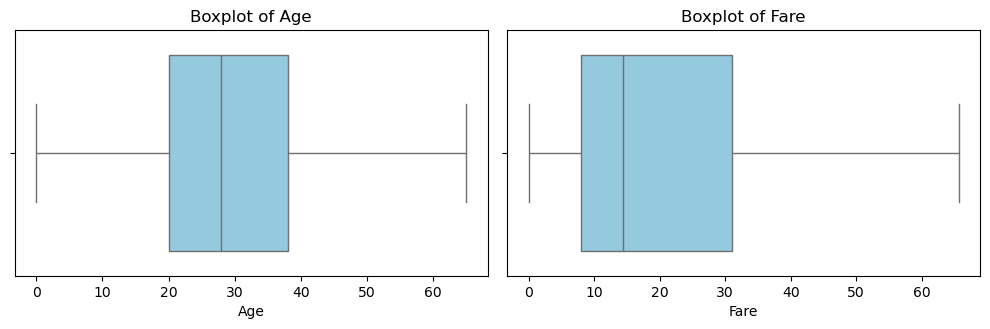

In [50]:
# Columns to visualize
cols = ['Age', 'Fare']

# Set up the figure
plt.figure(figsize=(10, 6))

# Loop over each column to create a subplot
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


# insights

In [109]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Hometown,Boarded,Destination,Lifeboat,Deck,SDLabel,family_size,fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",Male,22,A/5 21171,7.2500,S,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",C,F,Dead,2,3.6250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,PC 17599,65.6344,C,"New York, New York, US",Cherbourg,"New York, New York, US",4,C,Survived,2,32.8172
2,3,1,3,"Heikkinen, Miss. Laina",Female,26,STON/O2. 3101282,7.9250,S,"Jyväskylä, Finland",Southampton,New York City,14,F,Survived,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,113803,53.1000,S,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,C,Survived,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",Male,35,373450,8.0500,S,"Birmingham, West Midlands, England",Southampton,New York City,C,F,Dead,1,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",Male,27,211536,13.0000,S,"Gudinė, Lithuania [76]",Southampton,"Worcester, Massachusetts, US",14,F,Dead,1,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19,112053,30.0000,S,"Greenwich, Connecticut, US",Southampton,"Greenwich, Connecticut, US",3,B,Survived,1,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,7,W./C. 6607,23.4500,S,"Thornton Heath, London, England",Southampton,"New London, Connecticut, US",C,F,Dead,4,5.8625
889,890,1,1,"Behr, Mr. Karl Howell",Male,26,111369,30.0000,C,"New York, New York, US",Cherbourg,"New York, New York, US",5,C,Survived,1,30.0000


<Axes: xlabel='Sex', ylabel='Age'>

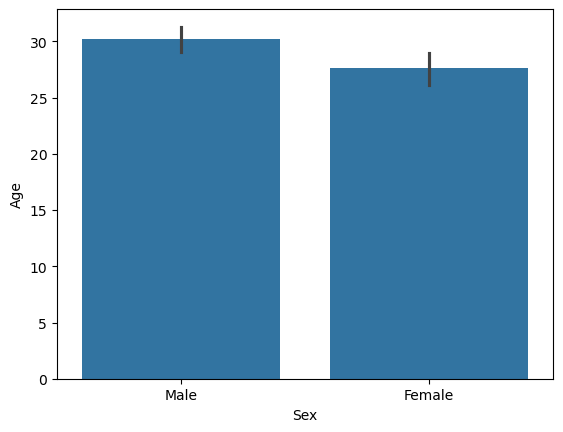

In [117]:
sns.barplot(data=df,x="Sex",y="Age",estimator="mean")

### The average Age for both genders

<Axes: xlabel='Sex', ylabel='Survived'>

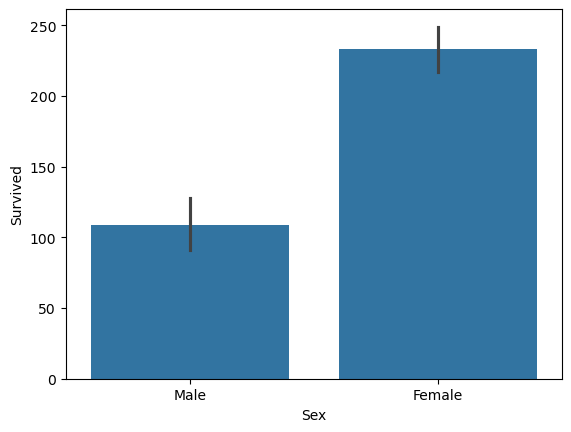

In [120]:
sns.barplot(data=df,x="Sex",y="Survived",estimator=sum)

### most of the survivals were females

<Axes: xlabel='Pclass', ylabel='Fare'>

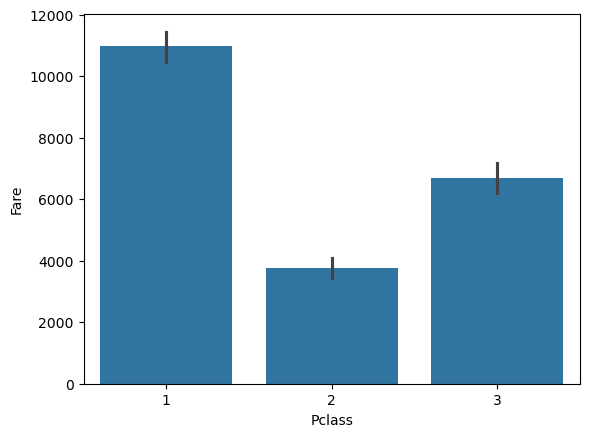

In [123]:
sns.barplot(data=df,x="Pclass",y="Fare",estimator=sum)

### the top classes that give the highest amount of money **1 , 3**

<Axes: xlabel='Embarked', ylabel='count'>

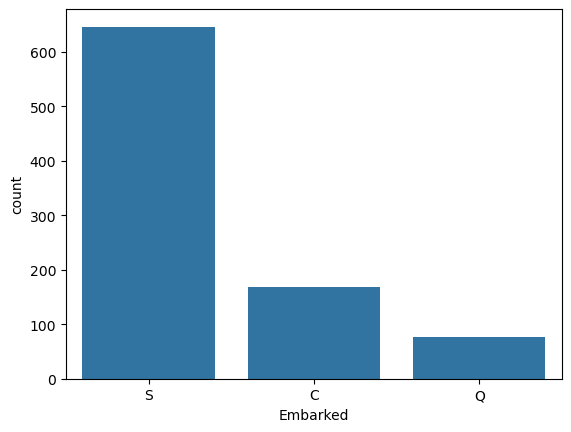

In [128]:
sns.countplot(data=df,x="Embarked")

### `Embarked`| Port where the passenger boarded the highest is southampton and least queenstown

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'New York, New York, US'),
  Text(1, 0, 'New York City'),
  Text(2, 0, 'Chicago, Illinois, US'),
  Text(3, 0, 'Winnipeg, Manitoba, Canada'),
  Text(4, 0, 'Montreal, Quebec, Canada'),
  Text(5, 0, 'Philadelphia, Pennsylvania, US'),
  Text(6, 0, 'Jacksonville, Florida, US'),
  Text(7, 0, 'Ottawa, Ontario, Canada'),
  Text(8, 0, 'Detroit, Michigan, US'),
  Text(9, 0, 'Brooklyn, New York, US')])

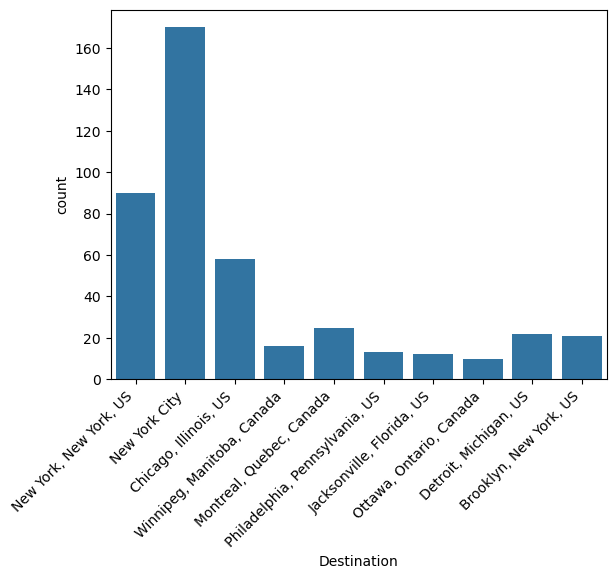

In [140]:
top_dest = df["Destination"].value_counts().nlargest(10).index
filtered_df = df[df["Destination"].isin(top_dest)]
sns.countplot(data=filtered_df,x="Destination")
plt.xticks(rotation=45,ha="right")

### New york city is the highest destination

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'New York, New York, US'),
  Text(1, 0, 'Kisa, Östergötland, Sweden'),
  Text(2, 0, 'London, England, UK'),
  Text(3, 0, 'Unknown, Bulgaria'),
  Text(4, 0, 'Paris, France'),
  Text(5, 0, 'Hardîne, Lebanon'),
  Text(6, 0, 'Hong Kong, China'),
  Text(7, 0, 'London, England'),
  Text(8, 0, 'Montreal, Quebec, Canada'),
  Text(9, 0, 'Peterborough, Cambridgeshire, England')])

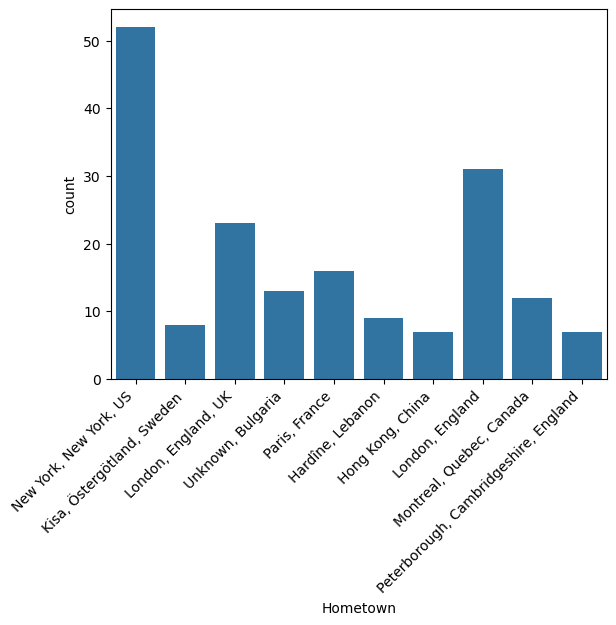

In [143]:
top_HT = df["Hometown"].value_counts().nlargest(10).index
filtered_df = df[df["Hometown"].isin(top_HT)]
sns.countplot(data=filtered_df,x="Hometown")
plt.xticks(rotation=45,ha="right")

### The highest hometown is the **New york,New york,US** 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'C'),
  Text(1, 0, '4'),
  Text(2, 0, '14'),
  Text(3, 0, 'D'),
  Text(4, 0, '3'),
  Text(5, 0, '15'),
  Text(6, 0, ''),
  Text(7, 0, '13'),
  Text(8, 0, '8'),
  Text(9, 0, '7'),
  Text(10, 0, '6'),
  Text(11, 0, '16'),
  Text(12, 0, '12'),
  Text(13, 0, '10'),
  Text(14, 0, '11'),
  Text(15, 0, 'B'),
  Text(16, 0, '5'),
  Text(17, 0, 'A'),
  Text(18, 0, '9'),
  Text(19, 0, '2'),
  Text(20, 0, '1')])

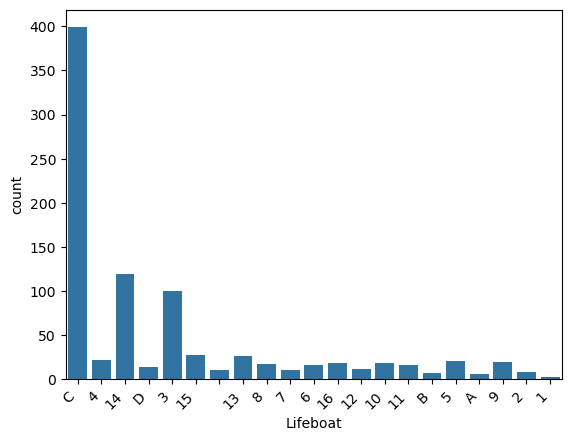

In [146]:
sns.countplot(data=df,x="Lifeboat")
plt.xticks(rotation=45,ha="right")

### most used boat is ** C boat --it is used by class 3** it tells that maybe the most of the survives from that class 

# Adding Features

## total survives and death

In [53]:
df['SDLabel'] = df['Survived'].map({0: 'Dead', 1: 'Survived'}) #total survives and deathes
total_S_D=df.pivot_table(index="SDLabel",values="Survived",aggfunc=["count"])
total_S_D

,count
,Survived
SDLabel,
Dead,549
Survived,342


## ticket price per class (Avreage)

In [55]:
ticketp_class=df.pivot_table(index="Pclass",values="Fare",aggfunc=["mean"])
ticketp_class

,mean
,Fare
Pclass,
1,50.814403
2,20.448444
3,13.619727


## family size 
we create this column and we will drop parch and sibsp it will be one upgraded column

In [57]:
df['family_size'] = df['Parch'] + df['SibSp'] + 1 

In [58]:
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: family_size, Length: 891, dtype: int64

In [59]:
df.drop(['Parch', 'SibSp'], axis=1, inplace=True) #cause we created family_size and is_alone it will be more useful so we drop them


## fare by person

In [61]:
df['fare_per_person'] = df['Fare'] / df['family_size'] 


In [62]:
df['fare_per_person']

0       3.6250
1      32.8172
2       7.9250
3      26.5500
4       8.0500
        ...   
886    13.0000
887    30.0000
888     5.8625
889    30.0000
890     7.7500
Name: fare_per_person, Length: 891, dtype: float64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int32  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    int32  
 6   Ticket           891 non-null    object 
 7   Fare             891 non-null    float64
 8   Embarked         891 non-null    object 
 9   Hometown         891 non-null    object 
 10  Boarded          891 non-null    object 
 11  Destination      891 non-null    object 
 12  Lifeboat         891 non-null    object 
 13  Deck             891 non-null    object 
 14  SDLabel          891 non-null    object 
 15  family_size      891 non-null    int64  
 16  fare_per_person  891 non-null    float64
dtypes: float64(2), i

# Save the Data

In [154]:
with pd.ExcelWriter("cleaned_Titanic.xlsx") as writer:
    df.to_excel(writer,sheet_name="Main",index=False)
    total_S_D.to_excel(writer,sheet_name="total_S_D",index=True)
    ticketp_class.to_excel(writer,sheet_name="ticketp_class",index=True)